## TRABAJO PRACTICO DE MATEMATICAS 3                          
                                                                                 
### Analisis del consumo de gasolina en relacion al HP
Se genero una regresion lineal simple utilizando los datos
del archivo Precio_autos.csv con el fin de analizar el consumo
de gasolina en relacion con el HP de los motores de vehiculos.

### Corto resumen del analisis llevado a cabo 
* Con las columnas citympg, highwaympg se obtiene un              
       promedio ponderado de acuerdo a la importancia del              
       consumo en ciudad y al consumo en autopista.                    
       Este promedio ponderado del citympg y del highwaympg se         
       guardan en una nueva columna y luego se aplica una conversion   
       de MPG (millas por galon) a GPM (galones por milla) para que   
       la grafica resultante de la regresion lineal sea creciente.     
* Tambien se utiliza la columna de horsepower y con se la coloca  
       como variable indepediente.            

### Guia de uso
Para poder llevar a cabo el analisis debe tener en cuenta lo siguiente:
* El archivo .CSV a utilizar debe estar en la misma carpeta que este .IPYNB
* Una vez abierto el archivo .IPYNB, debe ejecutarse y se le preguntara
  el peso que desea asignarle a la ciudad, esto hace referencia a que si desea
  evaluar el consumo de los motores utilizandose un % en ciudad y otro % en autopista.
  ejemplo:
  * si desea evaluar el GPM de los motores solamente en ciudad, debe ingresar 100.
  * si desea evaluar a los motores, 20% en ciudad y 80% en autopista, debe ingresar 20.

###  Conclusion
Una vez finalizado la grafica de regresion lineal, se vuelve
evidente y facilmente predicible que a mayor sea el HP del
motor de un vehiculo, mayor es el consumo de galones por milla.

###  Profesores
* Monica Hencek.
* Diego Salamida.
###  Alumno
* Bruno Daniel Lima.

### Input del peso de la ciudad:

In [17]:
# Input: ingresamos el % de peso que le daremos a la ciudad,
# el resto sera para la autopista
city_weight = float(input('Ingrese el % de peso que le dara a la ciudad, el resto sera para la autopista: '))

# Si se ingreso un numero mayor a 1, es decir, que se ingreso el porcentaje
# como 60 (representando al 60%), este numero se lo divide por 100 para tener 0.6
if (city_weight > 1):
    city_weight /= 100

### Importamos las librerias que se utilizaran:

In [18]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import matplotlib.pyplot as plt

### Tratamiento del archivo Precio_autos.csv, eliminacion de columnas y filtrado:

In [19]:
# Abrimos el archivo CSV y lo guardamos en dataset.
dataset = pd.read_csv('./Precio_autos.csv')

# Eliminamos columnas que no usaremos para facilitar la 
# visualizacion de todas las columnas y disminuir uso de ram.
dataset = dataset.drop(columns=['car_ID', 'symboling',  'aspiration', 'doornumber',
                                'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
                                'carlength', 'carwidth', 'carheight', 'curbweight',
                                'enginetype','cylindernumber', 'enginesize', 'boreratio',
                                'stroke', 'compressionratio', 'peakrpm', 'price'])

# Filtrado de muestras por fueltype.
dataset = dataset[dataset['fueltype'] == 'gas']

# Filtrado de muestras por fuelsystem.
dataset = dataset[dataset['fuelsystem'] == 'mpfi']

# Eliminamos la columna ya que ahora ya no nos interesa.
dataset = dataset.drop(columns=['fueltype'])
dataset = dataset.drop(columns=['fuelsystem'])

# Mostramos el resultado de llevar a cabo la limpieza de columnas y filtrado: 
print(dataset)


                      CarName  horsepower  citympg  highwaympg
0          alfa-romero giulia         111       21          27
1         alfa-romero stelvio         111       21          27
2    alfa-romero Quadrifoglio         154       19          26
3                 audi 100 ls         102       24          30
4                  audi 100ls         115       18          22
..                        ...         ...      ...         ...
199              volvo diesel         162       17          22
200           volvo 145e (sw)         114       23          28
201               volvo 144ea         160       19          25
202               volvo 244dl         134       18          23
204               volvo 264gl         114       19          25

[94 rows x 4 columns]


### Calculo del promedio ponderado de citympg y highwaympg, conversion de MPG A GPM:

In [20]:
# Asignacion de pesos para la ciudad y la autopista para calcular el 
# promedio ponderado entre el mpg de ciudad y el mpg de autopista.
#
# Esto sirve para que el interesado pueda establecer si quiere evaluar
# el consumo de gasolina mas enfocado en la ciudad que en la autopista
# o viceversa. 

# Asignamos peso a la autopista:
highway_weight = 1 - city_weight 

# Seleccion de columnas.
citympg = dataset.loc[:, 'citympg']
highwaympg = dataset.loc[:, 'highwaympg']

# Calculo del promedio ponderado y lo agregamos como una nueva columna.
heavympg_avg = ((citympg * city_weight) + (highwaympg * highway_weight))
dataset.insert(2, 'heavympg_avg', heavympg_avg, True)

# Eliminamos la columna ya que ahora ya no nos interesa.
dataset = dataset.drop(columns=['citympg', 'highwaympg'])

# Conversion de Millas por Galon (mpg) -> Galones por milla.
heavygpm_avg = np.divide(1, heavympg_avg)
dataset.insert(3, 'heavygpm_avg', heavygpm_avg, True)

# Mostramos el resultado de agregar la columna heavygpm_avg.
print(dataset)

                      CarName  horsepower  heavympg_avg  heavygpm_avg
0          alfa-romero giulia         111          22.8      0.043860
1         alfa-romero stelvio         111          22.8      0.043860
2    alfa-romero Quadrifoglio         154          21.1      0.047393
3                 audi 100 ls         102          25.8      0.038760
4                  audi 100ls         115          19.2      0.052083
..                        ...         ...           ...           ...
199              volvo diesel         162          18.5      0.054054
200           volvo 145e (sw)         114          24.5      0.040816
201               volvo 144ea         160          20.8      0.048077
202               volvo 244dl         134          19.5      0.051282
204               volvo 264gl         114          20.8      0.048077

[94 rows x 4 columns]


### Regresion Lineal Simple, colocamos el promedio ponderado (heavygpm_avg) como variable dependiente y horsepower como variable independiente:

In [21]:
# Columna de heavympg_avg en el eje X.
X = dataset.iloc[:, 1:2].values

# Columna de horsepower en el eje Y.
y = dataset.iloc[:, 3].values

# Regresion Lineal.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

regression = LinearRegression()
regression.fit(X_train, y_train)

y_pred = regression.predict(X_test)

### Graficado de la regresion lineal usando Matplotlib:

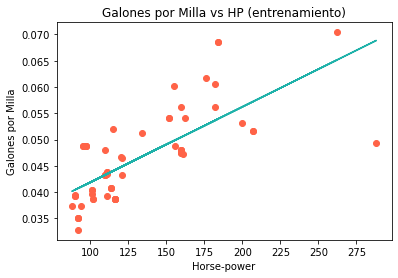

      Actual  Predicción
0   0.047393    0.049614
1   0.048780    0.052629
2   0.035971    0.040997
3   0.056180    0.053635
4   0.043290    0.044875
5   0.037175    0.043582
6   0.038760    0.044157
7   0.035971    0.041859
8   0.048077    0.049326
9   0.034364    0.039705
10  0.034364    0.039705
11  0.048077    0.043295
12  0.043290    0.043295
13  0.054054    0.050763
14  0.048077    0.043869
15  0.037175    0.043582
16  0.055866    0.047603
17  0.061728    0.052773
18  0.048780    0.050619
19  0.051546    0.057225
20  0.060241    0.049757
21  0.046729    0.048034
22  0.055249    0.046885
23  0.048077    0.043295
24  0.050505    0.047890
25  0.039370    0.040423
26  0.047170    0.049901
27  0.048780    0.043295
28  0.034364    0.039705
29  0.039683    0.043869
30  0.039683    0.043869
31  0.038760    0.042146


In [22]:
# Graficos de Entrenamiento.
plt.scatter(X_train, y_train, color = '#FF6347')
plt.plot(X_train, regression.predict(X_train), color = '#20B2AA')
plt.title('Galones por Milla vs HP (entrenamiento)')
plt.ylabel('Galones por Milla')
plt.xlabel('Horse-power')
plt.show()

# Valores Actuales vs Prediccion.
actual_vs_prediccion = pd.DataFrame({'Actual': y_test.flatten(), 'Predicción': y_pred.flatten()})
print(actual_vs_prediccion)

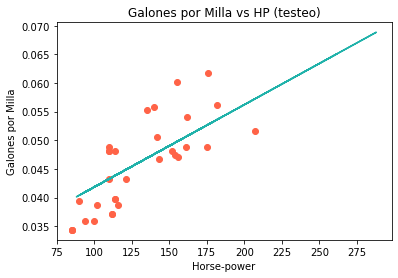

In [23]:
# Graficos de Testeo.
plt.scatter(X_test, y_test, color = '#FF6347')
plt.plot(X_train, regression.predict(X_train), color = '#20B2AA')
plt.title('Galones por Milla vs HP (testeo)')
plt.ylabel('Galones por Milla')
plt.xlabel('Horse-power')
plt.show()

### Calculo de los errores:

In [24]:
# Impresion
print(f'Error Medio Absoluto: {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Error cuadrático medio: {metrics.mean_squared_error(y_test, y_pred)}')
print(f'Raíz cuadrada del error cuadrático medio: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')

Error Medio Absoluto (MAE): 0.004443619118674351
Error cuadrático medio (MSE): 2.559300768494716e-05
Raíz cuadrada del error cuadrático medio (RMSE): 0.005058953220276618
